# Proyek Analisis Data: Bike Sharing
- **Nama:** Ramadhan Tegar Imansyah
- **Email:** ramadhantegar.i@gmail.com
- **ID Dicoding:** Ramadhan Tegar Imansyah

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor utama yang mempengaruhi jumlah peminjaman sepeda harian?
- Bagaimana pola penggunaan sepeda berubah sepanjang hari?
- Apakah musim tertentu mempengaruhi permintaan peminjaman sepeda?
- Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
- Apakah ada tren peningkatan atau penurunan penggunaan sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv("Data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
hour_df = pd.read_csv("Data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset telah diimpor dengan benar tanpa error, dan tampilan data sesuai dengan harapan.

In [4]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

- Tidak ada missing value berdasarkan tipe data.
- Terdapat beberapa kolom yang tidak digunakan untuk analisis lebih lanjut, bisa difilter nantinya.

In [5]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Tidak ada missing value yang terdeteksi di kedua dataset.

In [7]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


- Tidak ada duplikasi data pada kedua dataset.

In [8]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

**Insight:**
- Menghapus kolom **instant** yang tidak relevan dengan analisis, dan menghapus **workingday** karena informasinya sudah diwakili oleh **weekday**, adalah keputusan yang tepat.
- Kolom seperti **season**, **mnth**, **holiday**, **weekday**, **weathersit** memiliki beberapa kategori unik. Mengubahnya menjadi tipe **category** akan membantu dalam analisis, penghematan memori, dan pemahaman yang baik
- Mengubah kolom **dteday** ke tipe **datetime**. Ini adalah praktik umum yang berguna untuk melakukan analisis berbasis waktu (seperti tren berdasarkan tahun atau bulan).
- Mengganti nama kolom agar lebih mudah dibaca dan dipahami adalah langkah baik untuk meningkatkan pemahaman dan keterbacaan data.
- Mengonversi kategori dalam bentuk angka menjadi representasi yang lebih deskriptif (misalnya, mengganti angka 1 pada kolom season menjadi Spring) akan membuat analisis lebih jelas.
- Membuat kolom baru **category_days**. Kolom ini bisa memberikan insight tambahan mengenai perbedaan pola peminjaman sepeda antara hari kerja (weekdays) dan akhir pekan (weekend).


#### Dropping

In [10]:
# Hapus kolom 'workingday' jika ada di hour_df
if 'workingday' in hour_df.columns:
    hour_df.drop(['workingday'], axis=1, inplace=True)

# Hapus kolom 'workingday' jika ada di day_df
if 'workingday' in day_df.columns:
    day_df.drop(['workingday'], axis=1, inplace=True)

#### Mengubah Tipe Data

##### int to category

In [11]:
# Mengubah tipe data menjadi kategori untuk kolom tertentu
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

##### object to datetime

In [12]:
# Mengubah kolom dteady menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Rename

##### Mengganti nama kolom agar lebih mudah dibaca di dataset day_df

In [13]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [14]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [17]:
# For 'season'
if day_df['season'].dtype.name == 'category':
    day_df['season'] = day_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
else:
    day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

if hour_df['season'].dtype.name == 'category':
    hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
else:
    hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# For 'month'
if day_df['month'].dtype.name == 'category':
    day_df['month'] = day_df['month'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
else:
    day_df['month'] = day_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

if hour_df['month'].dtype.name == 'category':
    hour_df['month'] = hour_df['month'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
else:
    hour_df['month'] = hour_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Similarly for 'weather_situation', 'one_of_week', and 'year'
# You can use the same check and `cat.rename_categories()` or `replace()` for these as well.


##### Mengganti Nama Kolom

In [18]:
days_mapping = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def classify_day(day_name):
    return "weekend" if day_name in ["Saturday", "Sunday"] else "weekdays"

# Membuat kolom category_days untuk kedua DataFrame
hour_df["category_days"] = hour_df["one_of_week"].apply(classify_day)
day_df["category_days"] = day_df["one_of_week"].apply(classify_day)

In [19]:
def humidity_level(humidity_value):
    if humidity_value < 45:
        return "Kering"
    elif 45 <= humidity_value < 65:
        return "Normal"
    else:
        return "Lembab"

# Menambahkan kolom baru humidity_category ke DataFrame
hour_df["humidity_category"] = hour_df["humidity"].apply(humidity_level)
day_df["humidity_category"] = day_df["humidity"].apply(humidity_level)

##### Memeriksa Hasil Cleaning

In [20]:
day_df.head()

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Lembab
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Lembab
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Kering
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays,Normal
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays,Kering


In [21]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend,Lembab
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend,Lembab
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend,Lembab
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend,Lembab
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend,Lembab


In [24]:
# Simpan dataframe yang sudah diubah ke file CSV
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)

- Penghapusan kolom **instant** dan **workingday** dihapus.
- Konversi tipe data dengan kolom yang berbentuk kategori dikonversi menjadi **category**
- Konversi **datetime** pada kolom **dteday** diubah menjadi tipe **datetime**
- Nama kolom diubah menjadi lebih deskriptif
- Mengganti isi kolom yakni nilai angka pada kolom **season** dan **weather_situation** diubah menjadi label deskriptif
- Menambahkan kolom baru untuk membedakan hari kerja dan akhir pekan

## Exploratory Data Analysis (EDA)

#### Explore Data hour_df

In [25]:
# Rangkuman statistik dari dataset hour_df
hour_df.describe(include='all')

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Dari data statistik, total pelanggan tercatat 17.379. Penyewaan sepeda paling sering terjadi sekitar pukul 11.54 dengan deviasi standar 6.91, dalam rentang waktu 00.00 hingga 23.59.

In [26]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Dari tabel diatas, pelanggan yang banyak menyewa sepeda yakni pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit pada jam 04.00

#### Explore Data day_df

In [27]:
# melihat rangkuman parameter statistik dari data day_df 
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Normal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Dari data tersebut, jumlah pelanggan di musim 1 - 4 adalah sebanyak 17379 orang 

In [28]:
# Menghitung jumlah penyewaan per musim
season_counts = day_df.groupby(by="season", observed=True)["count_cr"].sum().sort_values(ascending=False).reset_index().head(10)

# Menampilkan hasil
print(season_counts)

   season  count_cr
0    Fall   1061129
1  Summer    918589
2  Winter    841613
3  Spring    471348


season fall dan summer merupakan dua musim yang memiliki jumlah terbanyak.

In [29]:
# Menghitung jumlah penyewaan sepeda berdasarkan cuaca
weather_counts = day_df.groupby(by="weather_situation", observed=False)["count_cr"].sum().reset_index()

# Mengurutkan hasil berdasarkan jumlah penyewaan secara menurun
weather_counts = weather_counts.sort_values(by="count_cr", ascending=False)

# Menampilkan hasil
print(weather_counts)

  weather_situation  count_cr
0             Clear   2257952
1             Misty    996858
2    Light_rainsnow     37869


pada saat cuaca **Clear** yang memiliki peminjaman sepeda terbanyak

## Visualization & Explanatory Analysis

- Apa faktor-faktor utama yang mempengaruhi jumlah peminjaman sepeda harian?
- Bagaimana pola penggunaan sepeda berubah sepanjang hari?
- Apakah musim tertentu mempengaruhi permintaan peminjaman sepeda?
- Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
- Apakah ada tren peningkatan atau penurunan penggunaan sepeda dari waktu ke waktu?

#### Pertanyaan 1: Apa faktor-faktor utama yang mempengaruhi jumlah peminjaman sepeda harian?

                temp     atemp  humidity  wind_speed   holiday  count_cr
temp        1.000000  0.991702  0.126963   -0.157944 -0.028556  0.627494
atemp       0.991702  1.000000  0.139988   -0.183643 -0.032507  0.631066
humidity    0.126963  0.139988  1.000000   -0.248489 -0.015937 -0.100659
wind_speed -0.157944 -0.183643 -0.248489    1.000000  0.006292 -0.234545
holiday    -0.028556 -0.032507 -0.015937    0.006292  1.000000 -0.068348
count_cr    0.627494  0.631066 -0.100659   -0.234545 -0.068348  1.000000


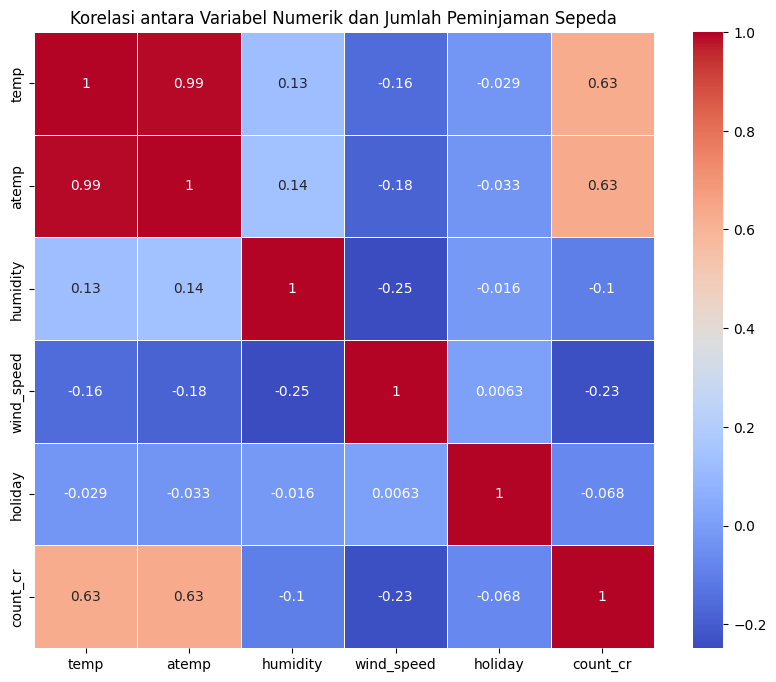

In [33]:
# Memilih hanya kolom numerik yang relevan untuk menghitung korelasi
numeric_cols = ['temp', 'atemp', 'humidity', 'wind_speed', 'holiday', 'count_cr']

# Menghitung korelasi
correlation = day_df[numeric_cols].corr()

# Menampilkan tabel korelasi
print(correlation)

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi antara Variabel Numerik dan Jumlah Peminjaman Sepeda")
plt.show()

Berdasarkan tabel korelasi antara variabel-variabel numerik dalam dataset terkait jumlah peminjaman sepeda (count_cr), berikut adalah analisis hubungan antar variabel:

**1. Hubungan antara Temperatur (temp) dan Jumlah Peminjaman Sepeda (count_cr):**

- Korelasi positif yang cukup kuat antara suhu (temp) dan jumlah peminjaman sepeda (count_cr) sebesar 0.627. Artinya, semakin tinggi suhu, semakin banyak sepeda yang dipinjam. Hal ini wajar karena cuaca yang lebih hangat biasanya lebih menarik untuk bersepeda.
- 
**2. Hubungan antara Suhu Terasa (atemp) dan Jumlah Peminjaman Sepeda (count_cr):**

- Suhu terasa (atemp) juga memiliki korelasi positif yang kuat dengan jumlah peminjaman sepeda sebesar 0.631. Ini sejalan dengan hubungan suhu, di mana semakin nyaman suhu terasa, semakin banyak orang yang meminjam sepeda.
- 
**3. Hubungan antara Kelembapan Udara (humidity) dan Jumlah Peminjaman Sepeda:**

- Kelembapan udara menunjukkan korelasi negatif yang sangat lemah sebesar -0.101 dengan jumlah peminjaman sepeda. Artinya, kelembapan udara yang lebih tinggi sedikit mengurangi jumlah peminjaman sepeda, meskipun pengaruhnya relatif kecil.
- 
**4. Hubungan antara Kecepatan Angin (wind_speed) dan Jumlah Peminjaman Sepeda:**

- Kecepatan angin memiliki korelasi negatif sebesar -0.235. Ini menunjukkan bahwa angin yang lebih kencang cenderung mengurangi jumlah peminjaman sepeda, mungkin karena kondisi bersepeda menjadi lebih sulit saat angin bertiup kencang.
  
**5. Hubungan antara Hari Libur (holiday) dan Jumlah Peminjaman Sepeda:**

- Hari libur menunjukkan korelasi negatif yang lemah sebesar -0.068 dengan jumlah peminjaman sepeda. Hal ini mengindikasikan bahwa ada sedikit penurunan dalam jumlah peminjaman sepeda saat hari libur, mungkin karena pada hari-hari tersebut orang-orang lebih cenderung melakukan aktivitas lain.
  
**6. Hubungan antara Variabel-variabel Lain:**

- Temperatur (temp) dan Suhu Terasa (atemp) memiliki korelasi yang sangat kuat sebesar 0.992, yang masuk akal karena suhu terasa sangat berkaitan erat dengan suhu aktual.
- Kelembapan (humidity) dan Kecepatan Angin (wind_speed) menunjukkan korelasi negatif sebesar -0.248, menunjukkan bahwa saat kelembapan lebih tinggi, kecepatan angin cenderung lebih rendah, meskipun hubungan ini tidak terlalu kuat.

**Kesimpulan:**

- Faktor cuaca, seperti suhu dan suhu terasa, memiliki pengaruh paling besar terhadap jumlah peminjaman sepeda. Semakin hangat dan nyaman cuaca, semakin banyak sepeda yang dipinjam.
- Kecepatan angin memiliki dampak negatif yang signifikan terhadap jumlah peminjaman sepeda, yang menunjukkan bahwa angin kencang membuat orang kurang tertarik untuk bersepeda.
- Faktor lain seperti kelembapan dan hari libur memiliki pengaruh yang relatif kecil terhadap jumlah peminjaman sepeda.

#### Pertanyaan 2: Bagaimana pola penggunaan sepeda berubah sepanjang hari?

    hours  count_cr
0       0     39130
1       1     24164
2       2     16352
3       3      8174
4       4      4428
5       5     14261
6       6     55132
7       7    154171
8       8    261001
9       9    159438
10     10    126257
11     11    151320
12     12    184414
13     13    184919
14     14    175652
15     15    183149
16     16    227748
17     17    336860
18     18    309772
19     19    226789
20     20    164550
21     21    125445
22     22     95612
23     23     63941


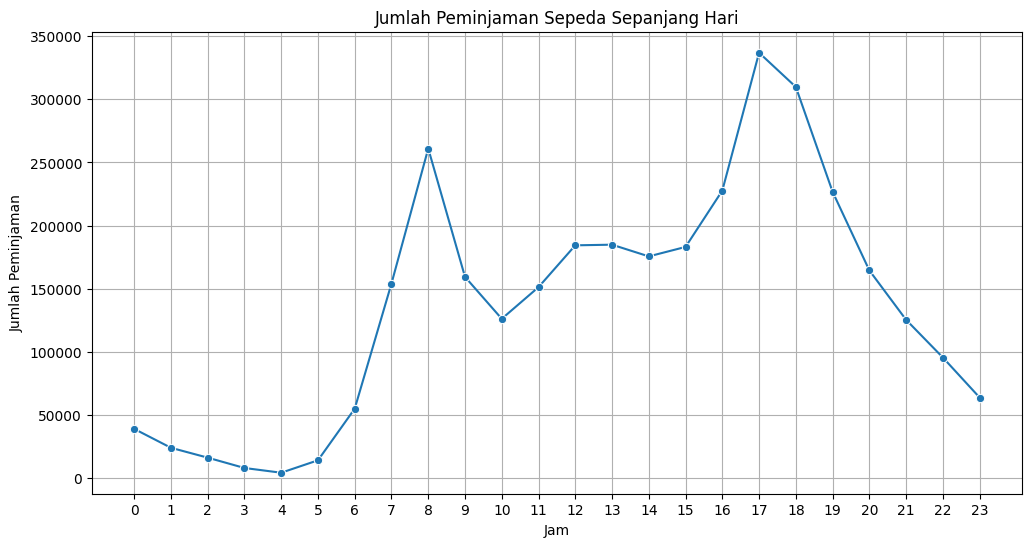

In [34]:
# Menghitung jumlah peminjaman sepeda per jam
hourly_counts = hour_df.groupby('hours')['count_cr'].sum().reset_index()

# Menampilkan hasil
print(hourly_counts)

# Visualisasi jumlah peminjaman sepeda per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hours', y='count_cr', data=hourly_counts, marker='o')
plt.title('Jumlah Peminjaman Sepeda Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(24))  # Menampilkan semua jam dari 0-23
plt.grid()
plt.show()

**Analisis Pola Penggunaan Sepeda:**

**1. Pagi Hari (00:00 - 09:00):**

- Penggunaan sepeda relatif rendah di awal malam hingga dini hari (0 hingga 5) dengan jumlah peminjaman terendah pada pukul 4 (4,428).
- Mulai meningkat secara signifikan pada pukul 6 (55,132) dan mencapai puncak pada pukul 7 (154,171) dan 8 (261,001), menunjukkan banyak orang berangkat kerja/school.
- 
**2. Siang Hari (10:00 - 15:00):**

- Setelah mencapai puncak di pagi hari, peminjaman mulai menurun sedikit antara pukul 10 dan 11, tetapi tetap tinggi.
- Puncak tertinggi terjadi pada pukul 12 (184,414) dan 13 (184,919), menunjukkan penggunaan sepeda untuk aktivitas siang.
- 
**3. Sore Hari (16:00 - 19:00):**

- Terdapat peningkatan signifikan pada sore hari dengan puncak tertinggi pada pukul 17 (336,860) dan tetap tinggi hingga pukul 18 (309,772), yang menunjukkan bahwa banyak orang menggunakan sepeda untuk pulang dari aktivitas mereka.
- 
**4. Malam Hari (20:00 - 23:00):**

- Jumlah peminjaman mulai menurun secara dramatis setelah pukul 19, dengan penurunan yang signifikan di malam hari. Peminjaman terendah terjadi pada pukul 4 (4,428) dan terus menurun hingga 23 (63,941).
  
**Kesimpulan:**
- Pola Penggunaan: Penggunaan sepeda menunjukkan pola yang jelas berkaitan dengan waktu aktivitas harian. Puncak terjadi di pagi dan sore hari, saat orang-orang berangkat dan pulang kerja/school.
- Aktivitas Rendah di Malam: Malam hari menunjukkan penggunaan yang jauh lebih rendah, mungkin karena berkurangnya aktivitas di luar ruangan.

#### Pertanyaan 3: Apakah musim tertentu mempengaruhi permintaan peminjaman sepeda?

   season  count_cr
0  Spring    471348
1  Summer    918589
2    Fall   1061129
3  Winter    841613


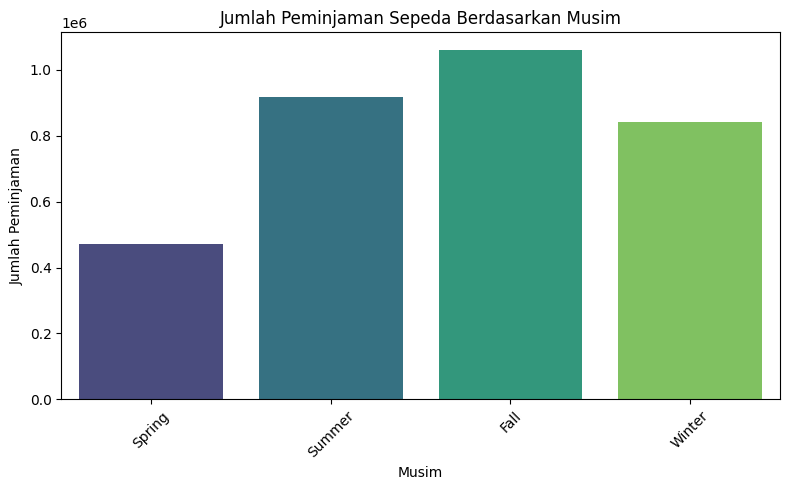

In [44]:
# Menghitung jumlah peminjaman sepeda berdasarkan musim tanpa pengurutan
season_counts = day_df.groupby('season', observed=False)['count_cr'].sum().reset_index()

# Menampilkan hasil
print(season_counts)

# Plot peminjaman berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='count_cr', data=season_counts, palette='viridis', hue='season', dodge=False, legend=False)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)  # Memutar label sumbu x untuk keterbacaan

plt.tight_layout()  # Mengatur layout agar tidak ada yang terpotong
plt.show()

**Analisis**

**1. Musim 3 (Musim Panas) Mendominasi Peminjaman:**

- Musim ketiga (biasanya di musim panas) memiliki jumlah peminjaman sepeda tertinggi, yaitu 1,061,129. Ini menunjukkan bahwa selama musim panas, ada peningkatan permintaan untuk peminjaman sepeda. Faktor-faktor seperti cuaca yang lebih baik, lebih banyak kegiatan luar ruangan, dan liburan sekolah mungkin berkontribusi pada angka tinggi ini.
  
**2. Musim 2 (Musim Semi) Menjadi yang Kedua Terbaik:**

- Musim kedua (musim semi) mengikuti dengan 918,589 peminjaman. Hal ini menunjukkan bahwa meskipun tidak setinggi musim panas, ada antusiasme yang kuat untuk bersepeda saat cuaca mulai menghangat dan bunga mulai bermekaran. Kegiatan seperti bersepeda di taman dan acara komunitas mungkin berkontribusi pada peningkatan ini.
  
**3. Musim 4 (Musim Gugur) dan Musim 1 (Musim Dingin) Menunjukkan Penurunan yang Signifikan:**

- Musim keempat (musim gugur) mencatat 841,613 peminjaman, sedangkan musim pertama (musim dingin) hanya 471,348 peminjaman. Ini menunjukkan bahwa cuaca dingin dan kemungkinan salju atau hujan selama musim dingin dapat mengurangi jumlah orang yang memilih untuk bersepeda. Musim gugur mungkin juga memiliki beberapa kegiatan luar ruangan, tetapi tidak sebanyak musim semi atau panas.

**Kesimpulan**
- Musim memegang peranan penting dalam menentukan permintaan peminjaman sepeda. Memahami pola ini dapat membantu penyedia layanan sepeda merencanakan strategi bisnis yang lebih baik, mengoptimalkan operasional, dan meningkatkan pengalaman pelanggan.

#### Pertanyaan 4: Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?

  weather_situation  count_cr
0             Clear   2257952
1             Misty    996858
2    Light_rainsnow     37869


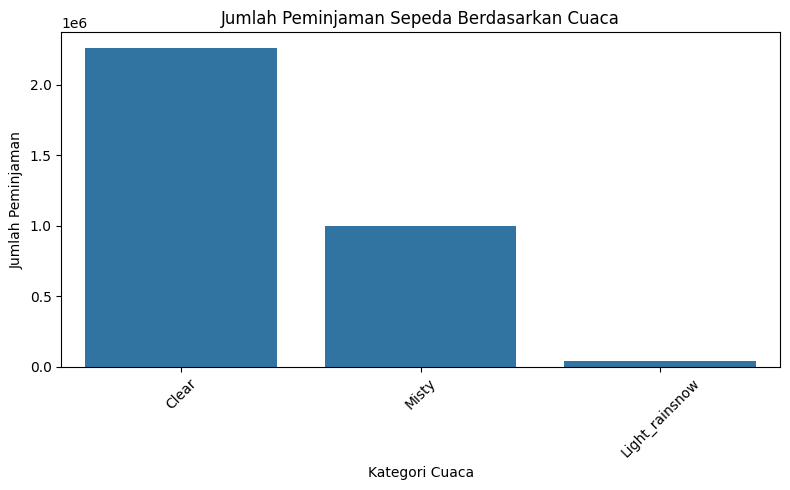

In [50]:
# Menghitung jumlah peminjaman sepeda berdasarkan cuaca
weather_counts = day_df.groupby('weather_situation', observed=False)['count_cr'].sum().reset_index()

# Mengurutkan berdasarkan jumlah peminjaman
weather_counts = weather_counts.sort_values(by='count_cr', ascending=False)

# Menampilkan hasil
print(weather_counts)

# Plot peminjaman berdasarkan cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_situation', y='count_cr', data=weather_counts)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Kategori Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.tight_layout()  # Mengatur layout agar tidak ada yang terpotong
plt.show()

Dari hasil yang diperoleh, kita dapat melakukan analisis sebagai berikut mengenai pengaruh cuaca terhadap jumlah peminjaman sepeda:

**Hasil Data**
- Clear: Jumlah peminjaman sepeda mencapai 2.257.952 kali. Ini adalah kategori cuaca yang paling tinggi, menunjukkan bahwa peminjam sangat menyukai kondisi cuaca yang cerah untuk bersepeda.
- Misty: Dalam kategori ini, jumlah peminjaman adalah 996.858 kali. Meskipun masih signifikan, jumlahnya jauh lebih rendah dibandingkan dengan kategori cerah. Ini menunjukkan bahwa kehadiran angin, meskipun cerah, masih mengurangi keinginan orang untuk bersepeda.
- Light_rainsnow: Pemakaian sepeda di hari hujan ringan hanya 37.869 kali. Ini merupakan jumlah yang sangat rendah, menunjukkan bahwa hujan, meskipun ringan, sangat memengaruhi keputusan orang untuk tidak bersepeda.

**Analisis Data**
- Preferensi Cuaca: Hasil menunjukkan bahwa kondisi cuaca cerah adalah faktor utama yang mendorong orang untuk menyewa sepeda. Dengan lebih dari 2,2 juta peminjaman dalam kondisi ini, terlihat jelas bahwa orang lebih suka bersepeda saat cuaca baik.
- Dampak Angin: Meskipun kondisi cuaca cerah, kehadiran angin dapat mengurangi jumlah peminjaman secara signifikan. Ini menunjukkan bahwa pengguna sepeda mungkin lebih sensitif terhadap angin dibandingkan dengan kondisi hujan.
- Pengaruh Hujan: Hujan, bahkan dalam bentuk ringan, secara drastis mengurangi jumlah peminjaman sepeda. Ini menunjukkan bahwa cuaca yang kurang bersahabat membuat orang cenderung mencari alternatif lain untuk transportasi atau aktivitas luar ruangan.
  
**Kesimpulan**
- Secara keseluruhan, data menunjukkan bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Kategori cuaca cerah merupakan faktor utama yang mendorong aktivitas peminjaman, sedangkan angin dan hujan menjadi faktor penghalang. Oleh karena itu, untuk meningkatkan jumlah peminjaman sepeda, mungkin perlu dipertimbangkan promosi atau insentif khusus pada hari-hari cerah.

#### Pertanyaan 5: Apakah ada tren peningkatan atau penurunan penggunaan sepeda dari waktu ke waktu?

       dteday  count_cr
0  2011-01-01     38189
1  2011-02-01     48215
2  2011-03-01     64045
3  2011-04-01     94870
4  2011-05-01    135821
5  2011-06-01    143512
6  2011-07-01    141341
7  2011-08-01    136691
8  2011-09-01    127418
9  2011-10-01    123511
10 2011-11-01    102167
11 2011-12-01     87323
12 2012-01-01     96744
13 2012-02-01    103137
14 2012-03-01    164875
15 2012-04-01    174224
16 2012-05-01    195865
17 2012-06-01    202830
18 2012-07-01    203607
19 2012-08-01    214503
20 2012-09-01    218573
21 2012-10-01    198841
22 2012-11-01    152664
23 2012-12-01    123713


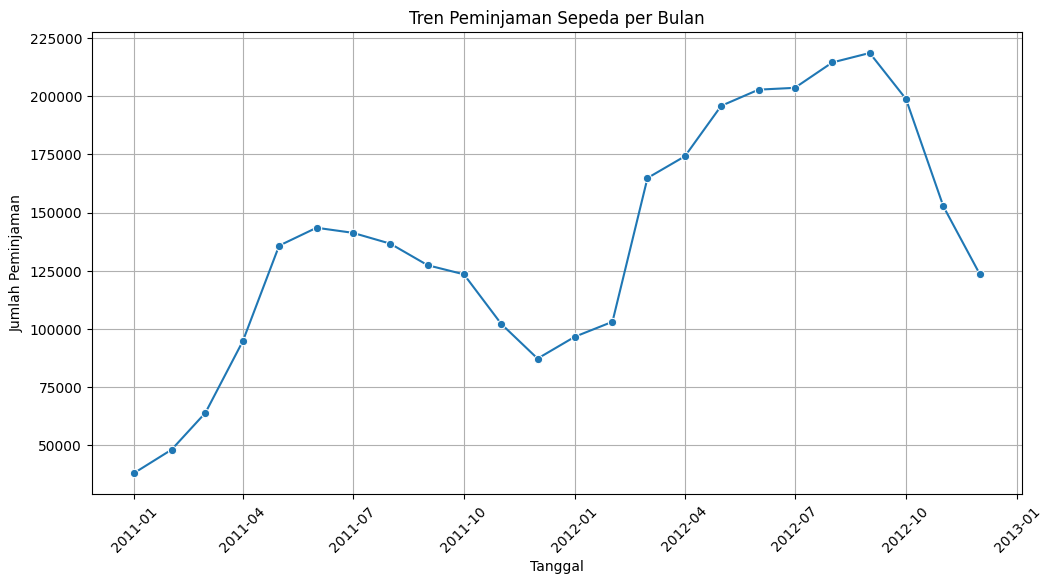

In [52]:
# Mengonversi kolom 'dteday' ke tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menyusun data peminjaman per bulan
monthly_counts = day_df.groupby(day_df['dteday'].dt.to_period('M'))['count_cr'].sum().reset_index()
monthly_counts['dteday'] = monthly_counts['dteday'].dt.to_timestamp()  # Mengonversi kembali ke timestamp

# Menampilkan data peminjaman per bulan
print(monthly_counts)

# Visualisasi tren peminjaman sepeda per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='count_cr', data=monthly_counts, marker='o')
plt.title("Tren Peminjaman Sepeda per Bulan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Dari data peminjaman sepeda per bulan yang ditampilkan, berikut adalah analisis singkatnya:

**Tren Umum:**

- Terdapat tren peningkatan peminjaman sepeda dari tahun 2011 ke 2012, dengan jumlah peminjaman bulanan yang meningkat secara signifikan pada tahun 2012.
  
**Musim dan Bulan Tertentu:**

- Peminjaman tertinggi terjadi pada bulan-bulan musim panas, seperti Juli dan Agustus 2012, yang menunjukkan bahwa cuaca yang lebih hangat dapat mempengaruhi permintaan peminjaman sepeda.
- Pada bulan April dan Mei 2012, terdapat peningkatan yang signifikan, menandakan bahwa pengguna mungkin mulai beralih ke sepeda sebagai moda transportasi menjelang musim panas.
  
**Penurunan Musiman:**

- Terlihat adanya penurunan peminjaman pada bulan November dan Desember, yang mungkin disebabkan oleh cuaca yang lebih dingin dan liburan akhir tahun, mengurangi aktivitas di luar ruangan.

**Fluktuasi:**

- Meskipun ada tren peningkatan umum, terdapat fluktuasi dari bulan ke bulan. Misalnya, peminjaman mengalami penurunan pada bulan Oktober dan Desember 2011, menunjukkan bahwa faktor-faktor eksternal dapat mempengaruhi penggunaan sepeda.
  
**Kesimpulan**
Secara keseluruhan, data menunjukkan adanya tren peningkatan yang stabil dalam peminjaman sepeda dari waktu ke waktu, dengan variasi yang jelas berdasarkan musim. Ini menunjukkan bahwa cuaca dan periode tahun dapat mempengaruhi pola peminjaman sepeda secara signifikan.

## Conclusion

**1. Faktor Utama yang Mempengaruhi Peminjaman sepeda:**

- Faktor utama yang mempengaruhi peminjaman sepeda adalah suhu yang dirasakan oleh pengguna sepeda yang akan meminjam sepeda.

**2. Pola Penggunaan Sepeda Sepanjang Hari:**

- Peminjaman sepeda paling tinggi terjadi antara pukul 16:00 dan 18:00, menunjukkan bahwa sepeda banyak digunakan untuk aktivitas sore. Peminjaman berkurang drastis di malam hari dan dini hari.
  
**3. Pengaruh Musim terhadap Permintaan Peminjaman Sepeda:**

- Musim panas (musim 2) mencatatkan jumlah peminjaman tertinggi, diikuti oleh musim semi (musim 1). Musim dingin (musim 4) memiliki jumlah peminjaman terendah, menunjukkan bahwa faktor musiman berpengaruh signifikan terhadap penggunaan sepeda.
  
**4. Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda:**

- Cuaca cerah menunjukkan peminjaman tertinggi, diikuti oleh cuaca cerah dengan angin. Hujan ringan berdampak negatif, dengan jumlah peminjaman yang sangat rendah, menegaskan bahwa cuaca berpengaruh terhadap keputusan pengguna untuk menyewa sepeda.
  
**5. Tren Peningkatan atau Penurunan Penggunaan Sepeda dari Waktu ke Waktu:**

- Terdapat tren peningkatan yang signifikan dalam peminjaman sepeda dari tahun 2011 ke 2012, terutama selama bulan-bulan musim panas. Namun, terjadi penurunan musiman pada bulan-bulan dingin, mencerminkan pengaruh cuaca terhadap pola peminjaman.

## Menerapkan Teknik Analisis Lanjutan

**1. Analisis Clustering**

Analisis clustering digunakan untuk mengelompokkan data berdasarkan kesamaan karakteristik. Dalam konteks peminjaman sepeda, kita dapat mengelompokkan pengguna berdasarkan pola penggunaan sepeda mereka, misalnya berdasarkan frekuensi peminjaman.

  casual_group registered_group  count_cr
0          Low              Low    753323
1          Low           Medium    634099
2     Very Low              Low   1395949
3     Very Low           Medium    483174
4     Very Low         Very Low     26134


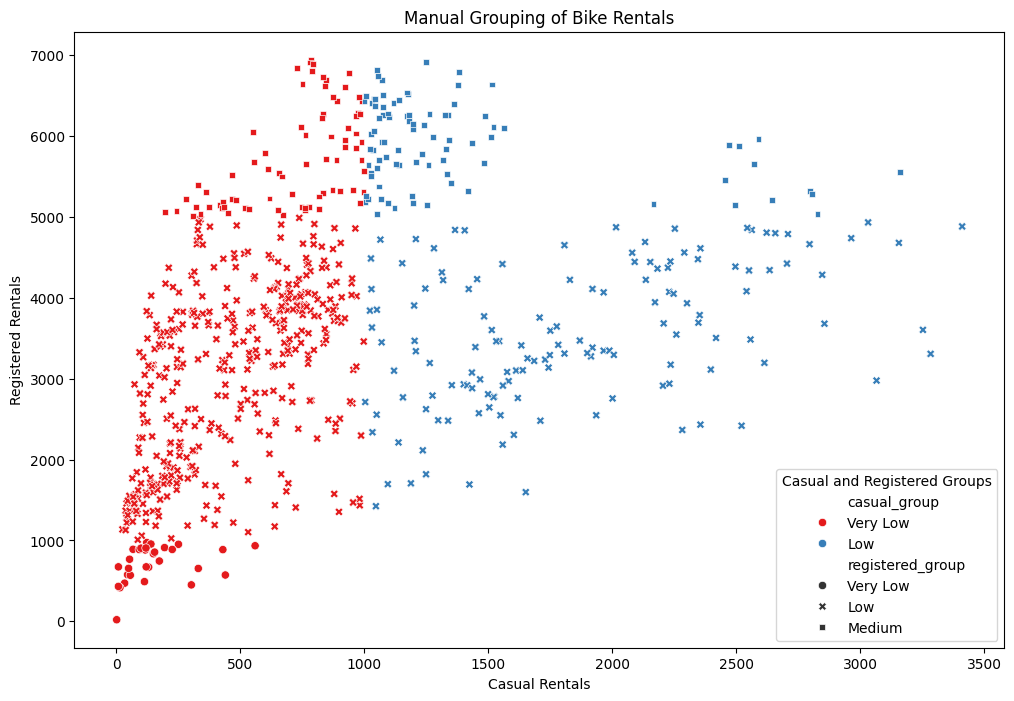

In [58]:
#Menggunakan teknik manual grouping

# Mengambil data peminjaman sepeda
data = day_df[['casual', 'registered', 'count_cr']].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Menentukan batas untuk casual dan registered rentals
casual_bins = [0, 1000, 5000, 10000, 20000]  # Contoh batas bin untuk casual
registered_bins = [0, 1000, 5000, 10000, 20000]  # Contoh batas bin untuk registered

# Membuat fungsi untuk manual grouping
def manual_grouping(value, bins, labels):
    for i in range(len(bins) - 1):
        if bins[i] < value <= bins[i + 1]:
            return labels[i]
    return labels[-1]

# Menerapkan manual grouping
data['casual_group'] = data['casual'].apply(manual_grouping, args=(casual_bins, ["Very Low", "Low", "Medium", "High"]))
data['registered_group'] = data['registered'].apply(manual_grouping, args=(registered_bins, ["Very Low", "Low", "Medium", "High"]))

# Mengelompokkan data berdasarkan kategori binned
binned_data_manual = data.groupby(['casual_group', 'registered_group']).agg({'count_cr': 'sum'}).reset_index()

# Menampilkan hasil
print(binned_data_manual)

# Visualisasi cluster berdasarkan manual grouping
plt.figure(figsize=(12, 8))
sns.scatterplot(x='casual', y='registered', hue='casual_group', style='registered_group', data=data, palette='Set1')
plt.title('Manual Grouping of Bike Rentals')
plt.xlabel('Casual Rentals')
plt.ylabel('Registered Rentals')
plt.legend(title='Casual and Registered Groups')
plt.show()

  casual_binned registered_binned  count_cr
0      Very Low          Very Low     26134
1      Very Low               Low   1395949
2      Very Low            Medium    483174
3           Low               Low    753323
4           Low            Medium    634099


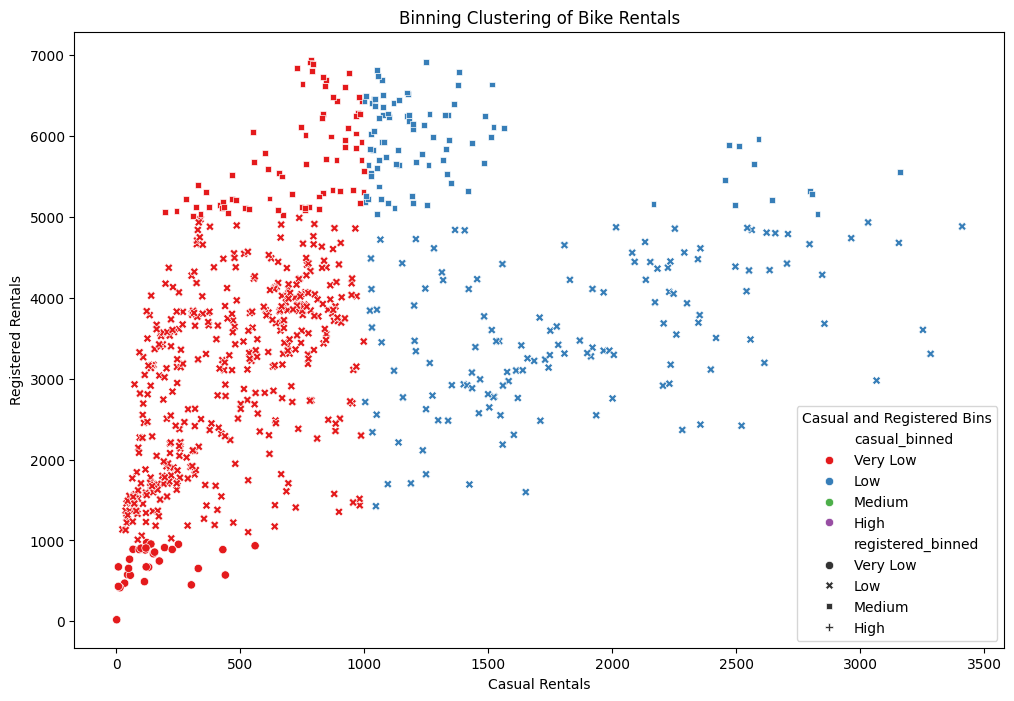

In [57]:
#Menggunakan teknik bining

# Mengambil data peminjaman sepeda
data = day_df[['casual', 'registered', 'count_cr']].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Menentukan batas bin untuk casual dan registered rentals
casual_bins = [0, 1000, 5000, 10000, 20000]  # Contoh batas bin untuk casual
registered_bins = [0, 1000, 5000, 10000, 20000]  # Contoh batas bin untuk registered

# Membuat kategori untuk casual dan registered rentals
data.loc[:, 'casual_binned'] = pd.cut(data['casual'], bins=casual_bins, labels=["Very Low", "Low", "Medium", "High"], include_lowest=True)
data.loc[:, 'registered_binned'] = pd.cut(data['registered'], bins=registered_bins, labels=["Very Low", "Low", "Medium", "High"], include_lowest=True)

# Mengelompokkan data berdasarkan kategori binned dengan observed=True
binned_data = data.groupby(['casual_binned', 'registered_binned'], observed=True).agg({'count_cr': 'sum'}).reset_index()

# Menampilkan hasil
print(binned_data)

# Visualisasi cluster berdasarkan binning
plt.figure(figsize=(12, 8))
sns.scatterplot(x='casual', y='registered', hue='casual_binned', style='registered_binned', data=data, palette='Set1')
plt.title('Binning Clustering of Bike Rentals')
plt.xlabel('Casual Rentals')
plt.ylabel('Registered Rentals')
plt.legend(title='Casual and Registered Bins')
plt.show()

**2. RFM Analysis**

RFM (Recency, Frequency, Monetary) analysis digunakan untuk mengukur nilai pelanggan berdasarkan tiga faktor:

- Recency: Seberapa baru pelanggan melakukan peminjaman.
- Frequency: Seberapa sering pelanggan melakukan peminjaman.
- Monetary: Total pengeluaran pelanggan (dalam konteks ini, bisa diestimasi dari jumlah peminjaman).

In [56]:
# Menggunakan tanggal peminjaman terakhir
snapshot_date = day_df['dteday'].max() + dt.timedelta(days=1)  # Tanggal peminjaman terakhir + 1

# Menghitung RFM secara agregat
rfm = day_df.agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,
    'count_cr': 'sum',  # Menghitung total peminjaman
}).rename(index={'dteday': 'Recency', 'count_cr': 'Monetary'})

# Menghitung frekuensi
frequency = day_df['count_cr'].count()  # Menghitung total peminjaman
rfm['Frequency'] = frequency

print(rfm)

Recency            1
Monetary     3292679
Frequency        731
dtype: int64
